# Variations

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import *

X_dataframe = pd.read_csv("../data/X_dataframe.csv")

In [2]:
X_dataframe["variations"].describe()

count     90000
unique     7375
top          []
freq      82626
Name: variations, dtype: object

In [3]:
X_dataframe["variations"].value_counts()

variations
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [4]:
import ast
X_dataframe["variations"] = X_dataframe["variations"].apply(ast.literal_eval)
X_dataframe["variations"].value_counts()

variations
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

## Variations amount

In [5]:
def get_amt_variations(x: list):
    if len(x) > 0:
        att_combs = 0
        for variation in x:
            att_combs += len(variation["attribute_combinations"])
        return att_combs
    else:
        return 0

X_dataframe["variations_amt"] = X_dataframe["variations"].apply(get_amt_variations)
X_dataframe["variations"] = X_dataframe["variations"].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)

In [6]:
X_dataframe["variations_amt"].describe()

count    90000.000000
mean         0.422667
std          2.587157
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        145.000000
Name: variations_amt, dtype: float64

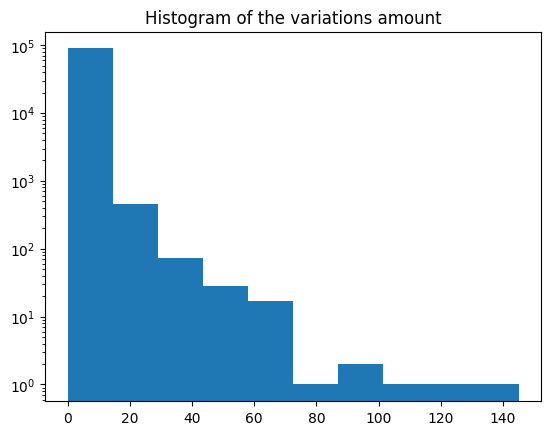

In [7]:
plt.hist(X_dataframe["variations_amt"])
plt.title("Histogram of the variations amount")
plt.yscale("log")
plt.show()

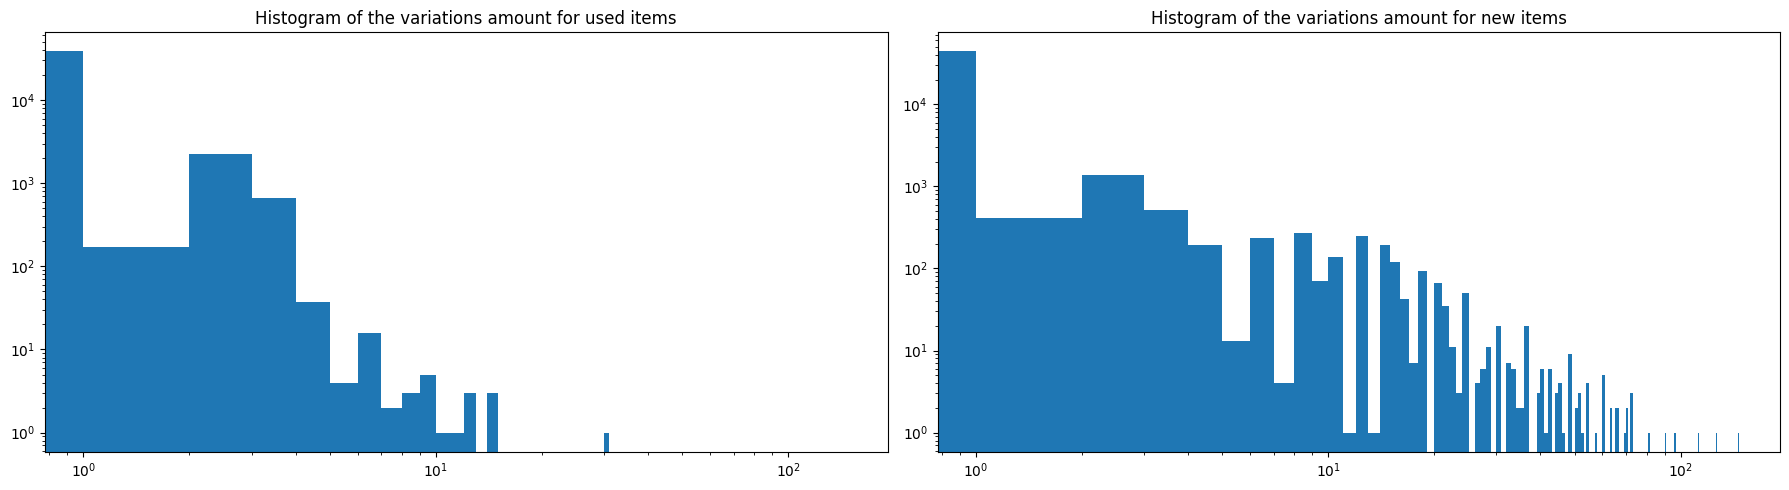

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

bins = np.arange(0, 150, 1)
ax[0].hist(X_dataframe.loc[X_dataframe["used"] == 1]["variations_amt"], bins=bins)
ax[0].set_title("Histogram of the variations amount for used items")
ax[0].set_yscale("log")
ax[0].set_xscale("log")

ax[1].hist(X_dataframe.loc[X_dataframe["used"] == 0]["variations_amt"], bins=bins)
ax[1].set_title("Histogram of the variations amount for new items")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
plt.tight_layout()
plt.show()


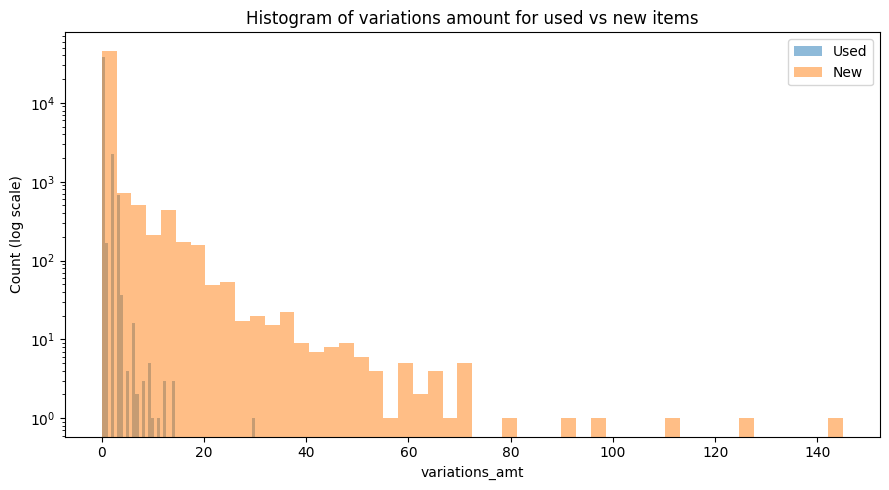

In [9]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 1, "variations_amt"],
    bins=50,
    alpha=0.5,  # transparency
    label="Used",
    color="tab:blue",
)

# New items
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 0, "variations_amt"],
    bins=50,
    alpha=0.5,
    label="New",
    color="tab:orange",
)

ax.set_yscale("log")
ax.set_title("Histogram of variations amount for used vs new items")
ax.set_xlabel("variations_amt")
ax.set_ylabel("Count (log scale)")
ax.legend()

plt.tight_layout()
plt.show()

In [100]:
variations_amount_bins = [-1, 0, 3, 200]
X_dataframe["variations_amount_bin"] = pd.cut(X_dataframe["variations_amt"], bins=variations_amount_bins)
X_dataframe["variations_amount_bin"].value_counts()

variations_amount_bin
(-1, 0]     82626
(0, 3]       5362
(3, 200]     2012
Name: count, dtype: int64

In [101]:
X_dataframe["variations_amount_bin"].dtype

CategoricalDtype(categories=[(-1, 0], (0, 3], (3, 200]], ordered=True, categories_dtype=interval[int64, right])

In [102]:
res = column_analysis("variations_amount_bin", X_dataframe)
display(res)

/Users/catalinatrujillo/Downloads/MELI_Challenge/challenge/eda/utils.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  used_percentage_by_value = df.groupby(column)["used"].mean()
/Users/catalinatrujillo/Downloads/MELI_Challenge/challenge/eda/utils.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n = df.groupby(column)["used"].size()


,n,prop_used,ci_lower,ci_upper
variations_amount_bin,,,,
"(0, 3]",5362,0.570310,0.557014,0.583505
"(-1, 0]",82626,0.466124,0.462725,0.469527
"(3, 200]",2012,0.037773,0.030285,0.047023


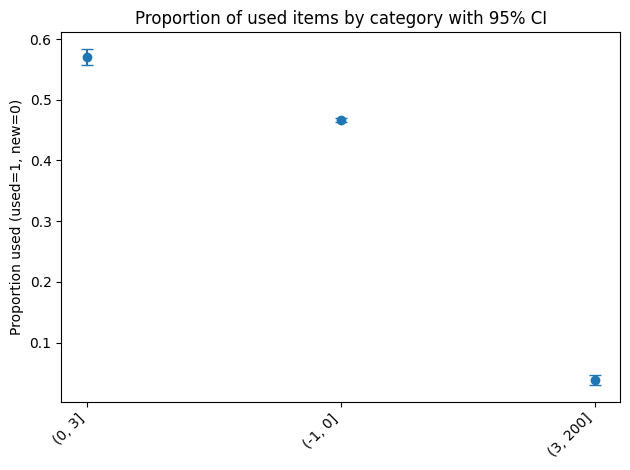

In [103]:
plot_column_analysis(res)

#### 💡 Insights  
The number of variations (`variations_amt`) differs notably between new and used items:  
- **Used items** are almost always concentrated at 0–1 variations.  
- **New items** often include multiple variations, with some listings having very large counts.  

When binning into ranges (`0`, `1–3`, `3–200`), the distinction becomes clearer:  
- Items with **no variations** have the highest proportion of used condition.  
- Items with **3 or more variations** are overwhelmingly new.  

This makes `variations_amt` a strong predictive feature.

## Variations

In [104]:
X_dataframe["variations"].describe()

count    90000.000000
mean         0.188033
std          1.083790
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         50.000000
Name: variations, dtype: float64

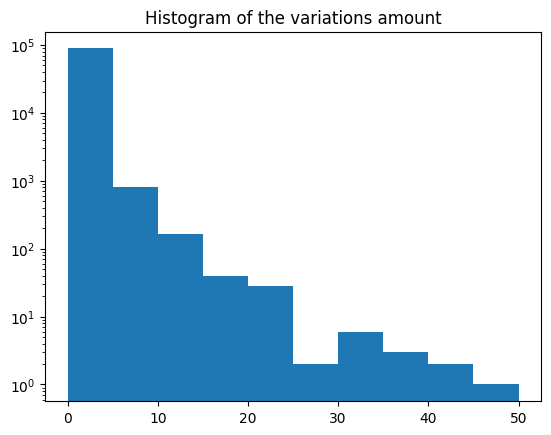

In [105]:
plt.hist(X_dataframe["variations"])
plt.title("Histogram of the variations amount")
plt.yscale("log")
plt.show()

/var/folders/lv/z9gn0bpj18l77_x5r1bqdj_m0000gn/T/ipykernel_47292/689939472.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[0].set_xlim(0, 100)
/var/folders/lv/z9gn0bpj18l77_x5r1bqdj_m0000gn/T/ipykernel_47292/689939472.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(0, 1e5)
/var/folders/lv/z9gn0bpj18l77_x5r1bqdj_m0000gn/T/ipykernel_47292/689939472.py:13: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[1].set_xlim(0, 100)
/var/folders/lv/z9gn0bpj18l77_x5r1bqdj_m0000gn/T/ipykernel_47292/689939472.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(0, 1e5)


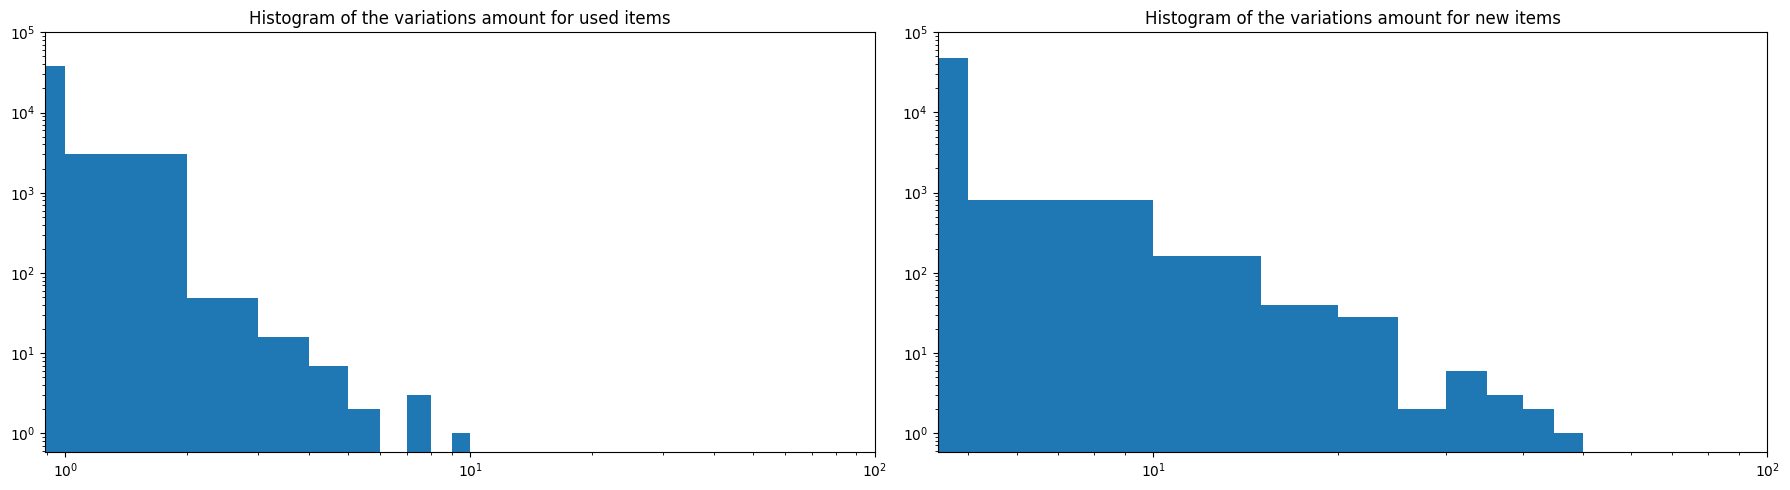

In [111]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

ax[0].hist(X_dataframe.loc[X_dataframe["used"] == 1]["variations"])
ax[0].set_title("Histogram of the variations amount for used items")
ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].set_xlim(0, 100)
ax[0].set_ylim(0, 1e5)
ax[1].hist(X_dataframe.loc[X_dataframe["used"] == 0]["variations"])
ax[1].set_title("Histogram of the variations amount for new items")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax[1].set_xlim(0, 100)
ax[1].set_ylim(0, 1e5)
plt.tight_layout()
plt.show()

In [109]:
variations_bins = [-1, 0, 2, 60]
X_dataframe["variations_bin"] = pd.cut(
    X_dataframe["variations_amt"], bins=variations_bins
)
X_dataframe["variations_bin"].value_counts()

variations_bin
(-1, 0]    82626
(0, 2]      4169
(2, 60]     3187
Name: count, dtype: int64

In [110]:
res = column_analysis("variations_bin", X_dataframe)
display(res)

/Users/catalinatrujillo/Downloads/MELI_Challenge/challenge/eda/utils.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  used_percentage_by_value = df.groupby(column)["used"].mean()
/Users/catalinatrujillo/Downloads/MELI_Challenge/challenge/eda/utils.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n = df.groupby(column)["used"].size()


,n,prop_used,ci_lower,ci_upper
variations_bin,,,,
"(0, 2]",4169,0.572559,0.557482,0.587503
"(-1, 0]",82626,0.466124,0.462725,0.469527
"(2, 60]",3187,0.234390,0.220007,0.249412


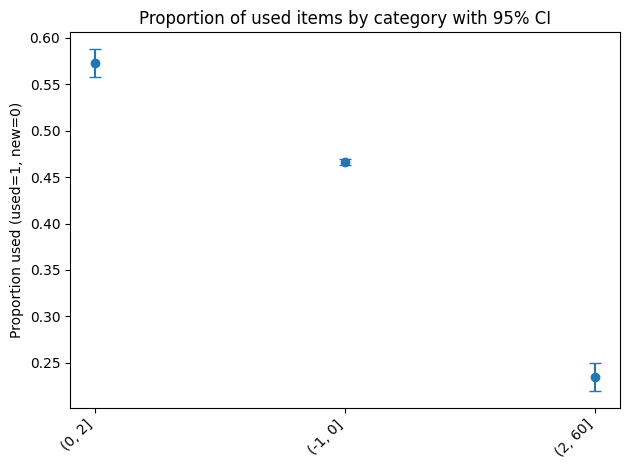

In [49]:
plot_column_analysis(res)

#### 💡 Insights  
The number of variations (`variations`) shows a clear relationship with item condition:  
- Items with **0 variations** have the highest proportion of used items.  
- Items with **1–2 variations** are more balanced between new and used.  
- Items with **2 or more variations** are much more likely to be new.  

This makes `variations` (or its binned version) a strong predictive feature for distinguishing item condition.